# Review : Wasserstein GAN

## Paper Review

### 1. Motivation

**1) How to solve Unsupervised Learning**
- Unsupervised Learning : 정답 라벨 y 없이 데이터 x의 분포 P(x)를 직접 학습
- Classical approach : MLE (Maximum Likelihood Estimation) 
By defining probability density $P_\theta$ and finding the one that maximized likelihood 
<img src="https://blog.kakaocdn.net/dn/4HgQb/btqu2IouBYN/dCQNXSAl4MS8F8ZkAKFkjk/img.png" width="200" height="100"/>


- Problem : P(x)를 직접 표현하는 것은 어려움 (표현할 수 있다는 것은 정답을 이미 안다는 의미)
- GAN : x를 결정하는 latent variable z의 분포를 가정해 입력 → D와 G의 Minmax 학습을 통해 G의 분포가 P(x)에 가까워지도록 학습


**2) GAN의 문제점**
- D와 G 간의 balance를 유지하며 학습하는 것 자체의 어려움 (D와 G의 Minmax)
 - **Oscillation** : 특정 학습 iteration에서 D와 G의 학습이 서로를 상쇄해 수렴 x
 
- 학습 완료 후에도 Mode dropping (Mode collapsing) 현상 발생
 - **Mode collapsing** : 같은 숫자만 계속 생성되는 현상
 - 이유 : D가 충분한 가이드 역할을 해주지 못해서 모델이 최적점까지 학습되지 x
 - 결과 : 학습 데이터 전체의 분포 학습 x (일부분만 학습)
 - 특히 학습 데이터 분포가 multi-modal인 경우 두드러짐 (ex. MNIST)
 
- 위와 반대로, D의 성능이 너무 좋으면 ? 
 - Loss가 0에 가까워지는 **Vanishing Gradient** 문제 발생
 - 결과 : 학습이 매우 느려지거나 불가
  
  
 
**3) GAN vs. WGAN**  
- GAN : D는 real/fake 판별 위해 sigmoid 사용 => real/fake 예측 확률값으로 학습
- WGAN : D 대신 critic 사용 => EM distance로 얻은 scalar 값으로 학습
 - critic : gradient를 잘 전달 + critic과 G를 최적점까지 학습시킬 수 있음
 - training 시 D와 G의 balance 살피지 않아도 되며, mode dropping 발생 x


---

### 2. Different types of Distance Metric

### 1) Distance (or Divergence) Metrics

**Notation**  
$\mathbb{P}_r$ : Real data distribution, $\mathbb{P}_g$ : Fake data distribution

**(1) Total Variation (TV) distance**

- $\delta(\mathbb{P}_r, \mathbb{P}_g) = \sup_{A \in \Sigma} |\mathbb{P}_r(A) - \mathbb{P}_g(A)|$ 

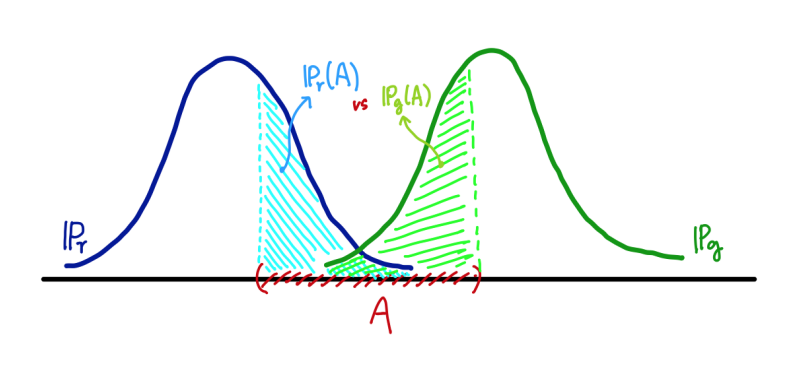

- sup (supremum) : 최소상계, max <-> inf (infimum) : 최대하계, min
- 두 확률분포의 측정값(적분값 = 면적)의 차이가 가장 큰 값
- 두 확률분포가 겹치지 않으면 1 (max)


**(2) Kullback-Leibler (KL) divergence**

- $KL(\mathbb{P}_r || \mathbb{P}_g) = \int \log \left ( {P_r(x) \over P_g(x)} \right ) P_r(x) d\mu (x)$  

- x를 $\mathbb{P}_r$의 확률공간에서 sampling 했을 때, '$P_r(x)$의 엔트로피 값과 $P_g(x)$의 엔트로피 값의 차'의 기대값(평균) = 상대적인 엔트로피
- 비대칭적 
- 두 확률분포가 겹치지 않으면 발산 

**(3) Jensen-Shannon (JS) divergence** 

- $JS(\mathbb{P}_r || \mathbb{P}_g) = {1 \over 2} KL(\mathbb{P}_r || \mathbb{P}_m) + {1 \over 2} KL(\mathbb{P}_g || \mathbb{P}_m) \text{, where } \mathbb{P}_m = (\mathbb{P}_r + \mathbb{P}_g)/2$  

- 대칭적. 부드러움. [0, 1] 범위로 한정됨
- 두 확률분포가 겹치지 않으면 $log2$ (상수)로 고정되어 정보를 줄 수 없음
- GAN에서의 D 입장 : GAN Loss 최소화 = JS diverence (Real과 Fake의 분포거리) 최대화
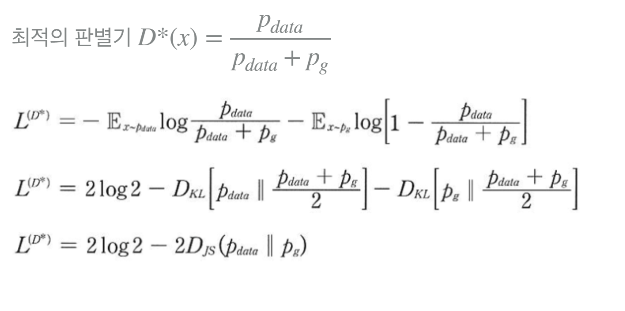
 

**(4) Earth-Mover (EM) distance**  

- $W(\mathbb{P}_r, \mathbb{P}_g) = \displaystyle \inf_{\gamma \in \Pi (\mathbb{P}_r, \mathbb{P}_g)} \mathbb{E}_{(x, y) \sim \gamma} \left [ \lVert x - y \rVert \right ]$  

- 두 확률분포의 모든 joint distribution 중에서 거리 d(X,Y)의 기댓값을 가장 작게 추정한 값
- inf (infimum) : 최대하계, min
- Earth-Mover ? $\mathbb{P}_r$에서 $\mathbb{P}_g$로 질량(mass)을 옮긴다.
- 출발지점과 도착지점의 차이를 구하고, 절댓값 씌어서 모두 평균한 것 중 가장 작은 값

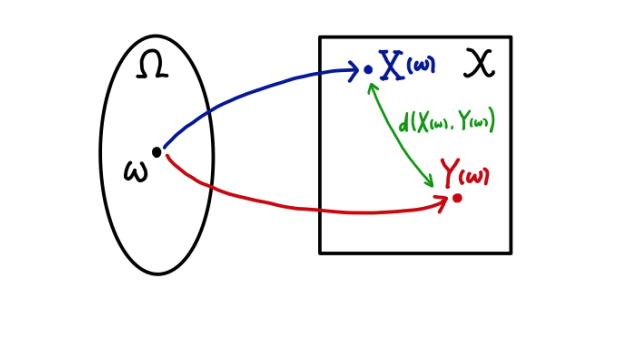
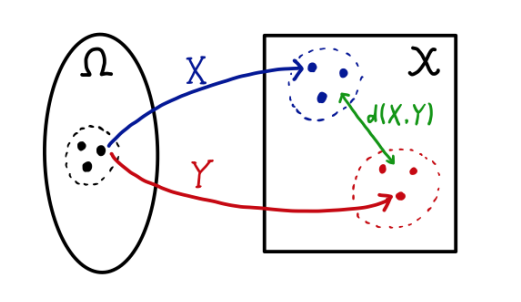
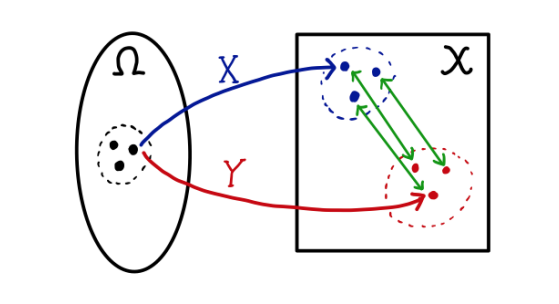




### 2) Wasserstein-1 distance (EM distance)

**(1) EM distance의 타당성** (WGAN의 Loss function에 사용해도 되는가) 

- $Z$ ~ $U[0,1]$ : the uniform distribution on the unit interval
- $\mathbb{P}_0$ : the distribution of $(0,Z)$ => 임의의 distribution
- $\mathbb{P}_\theta$ : the distribution of $(\theta,Z)$ => 학습시키는 현재의 distribution

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FYmaYj%2Fbtquqk3lbnz%2FWv4x6OKVMyVGnnOyHNc4dK%2Fimg.png" width="500" height="200"/>

$\begin{align*} &JS(\mathbb{P}_0 || \mathbb{P}_\theta) = \begin{cases} \log 2 & \text{if } \theta \neq 0 \\ 0 & \text{if } \theta = 0 \end{cases} \\ &KL(\mathbb{P}_0 || \mathbb{P}_\theta) = KL(\mathbb{P}_\theta || \mathbb{P}_0) = \begin{cases} +\infty & \text{if } \theta \neq 0 \\ 0 & \text{if } \theta = 0 \end{cases} \\ &\delta (\mathbb{P}_0, \mathbb{P}_\theta) = \begin{cases} 1 & \text{if } \theta \neq 0 \\ 0 & \text{if } \theta = 0 \end{cases} \end{align*}$

- 다른 거리들은 $\theta$에 따라 값이 달라짐 + 값 자체도 극단적
 - 두 분포가 서로 겹치는 경우에는 0, 겹치지 않는 경우에는 무한대 또는 상수
 - D와 G가 분포를 학습할 때 어려움을 겪을 수 있음 (초반에는 안겹쳐서 무한대 또는 상수 값 가지다가 겹쳐지면 갑자기 0값으로 변해서 gradient가 제대로 전달되지 x)

$W(\mathbb{P}_0, \mathbb{P}_\theta) = |\theta|$

- W distance는 $\theta$에 관계 없이 일정한 수식
- $Z_1$과 $Z_2$의 joint $γ$가 항상 $Z_1$ = $Z_2$가 되도록 sampling 된다면, 두 점 사이의 거리는 분포가 겹치는 것에 상관 없이 항상 $|\theta|$ 값 유지 → 학습 용이
<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbgTuVA%2FbtquvjpuC3k%2FForGkKZymHoiThlla45iO0%2Fimg.png" width="500" height="200"/>

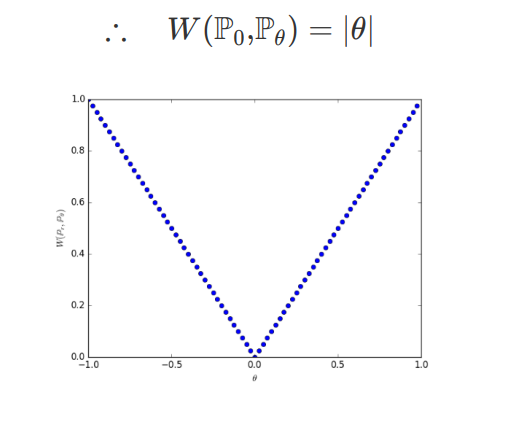


**(2) EM distance를 사용하기 위한 제약 조건**  

#### [Theorem 1] Wasserstein-1 distance의 연속성과 미분가능성

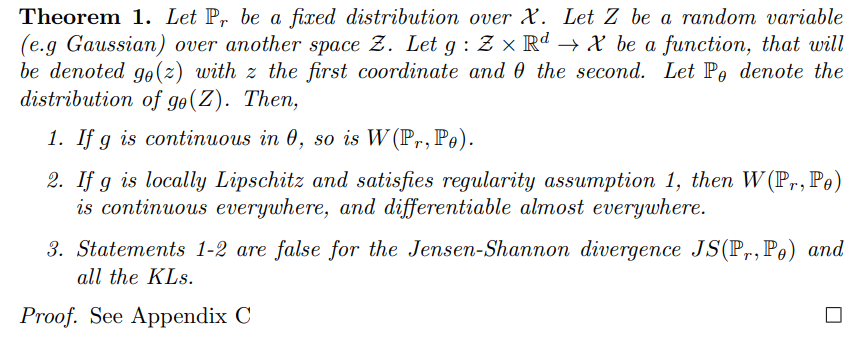

$P_r$ : 학습하고자 하는 목표 distribution  
$P_\theta$ : 학습시키는 현재의 distribution  
$Z$ : latent variable space  
$g$ : z를 x로 mapping 하는 함수 $P_\theta = g_\theta(Z)$  

1. $g$가 $θ$에 대해 연속한다면, $P_r$와 $P_\theta$의 EM distance 또한 연속한다.
2. $g$가 Lipschitz 조건을 만족한다면, $P_r$와 $P_\theta$의 EM distance 또한 연속하며 미분 가능하다.  

- EM distance가 연속적이고 미분 가능하다 = 최적의 critic 까지 훈련시킬 수 있다.  
- Critic은 saturate 되지 X (더 많이 학습시킬수록 더 신뢰할만한 gradient)  
→ Vanishing gradients in regular GAN 문제 해결


#### [Corollary 1]

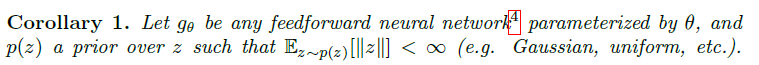
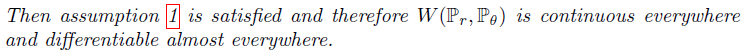

z에 대한 prior $p(z)$에 대해서 distance의 기댓값이 무한대보다 작으면, locally Lipschitz 조건을 만족  
→ Wasserstein-1 distance가 모든 곳에서 연속이고 거의 모든 곳에서 미분 가능

- Lipschitz 조건 : 두 점 사이의 거리를 일정 비 이상으로 증가시키지 않음
- 1-Lipschitz function : 임의의 두 점 사이의 평균변화율이 1을 넘지 않는 함수
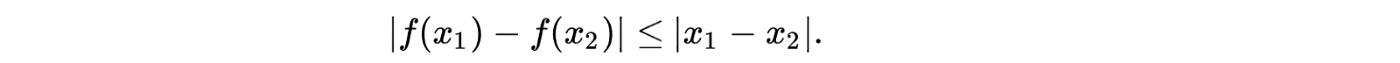




#### [Theorem 2] Wasserstein-1 distance와 분포수렴은 동치관계

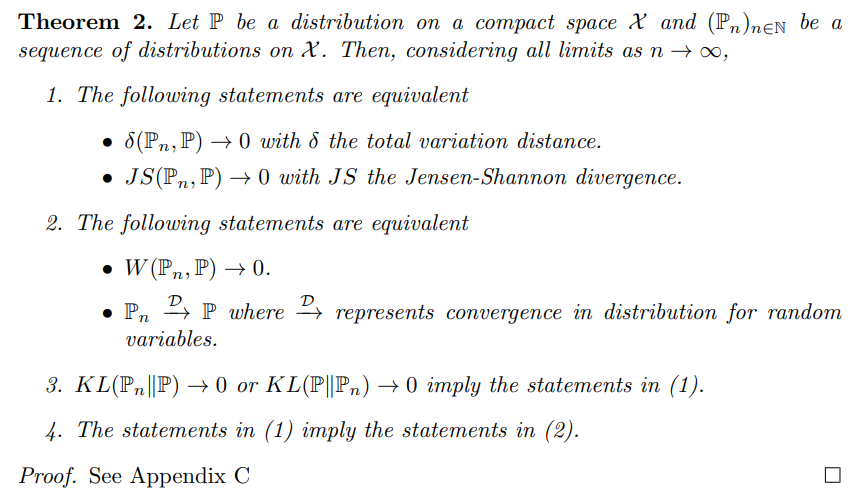

1. TV와 JS는 좋지 않다. (서로 겹치지 않는 상황에선 불연속)
2. W distance가 분포수렴과 동일하다.

> 분포수렴 : 확률분포의 개별적인 특징보다 전체적인 모양을 중시하는 약한 수렴

- 즉, 최적화가 이루어질 때 W distance가 TV나 JS 등에 비해 더 좋은 특성을 가진다. 

---


### 3. Wasserstein GAN

#### EM distance equation

$W(\mathbb{P}_r, \mathbb{P}_g) = \inf_{\gamma \in \Pi (\mathbb{P}_r, \mathbb{P}_g)} \mathbb{E}_{(x, y) \sim \gamma} \left [ \lVert x - y \rVert \right ]$

- EM distance 식의 inf 부분 ($P_r$과 $P_g$의 joint distribution) 계산 불가
- joint distribution space가 워낙 넓어 전부 탐색하는 것 불가능 & $P_r$은 목표 distribution이라 알지 못함)

#### 1) Kantorovich-Rubinstein Duality Theorem 이용해 식 변형
$W(\mathbb{P}_r, \mathbb{P}_g) = \sup_{||f||_L \le 1} \mathbb{E}_{x \sim \mathbb{P}_r} [f(x)] - \mathbb{E}_{x \sim \mathbb{P}_\theta} [f(x)]$
- $||f_w||_L \le 1$를 만족하는 $f$만 알아내면 $W$값을 얻을 수 있음 
- Theorem 증명 (참고) : [Wasserstein GAN and Kantorovich-Rubinstein Theorem](https://haawron.tistory.com/23)

#### 2) $f$를 알아내기 위한 학습 진행 (변수 $w$를 추가해 $f_w$를 update 하면서 근사)
$\max_{w \in \mathcal{W}} \mathbb{E}_{x \sim \mathbb{P}_r} [f_w(x)] - \mathbb{E}_{z \sim p(z)} [f_w(g_\theta(z))]$
- parameter 추가된 $f_w$로 변형 + $P_\theta$를 $g_\theta(Z)$에 대한 식으로 변형
- GAN Loss와 비슷한 형태
- 구현해야 할 남은 제한 사항 : $||f_w||_L \le 1$ => $f_w$가 1-Lipschitz function이라는 뜻

#### 3) Weight clipping
$\mathcal{W} = [-0.01, 0.01]^d$
- update한 W를 clipping : 가중치 W를 [-0.01, 0.01]로 제한 (0.01은 실험적으로 구한 값)
- 공간 W가 compact parameter 공간이 됨 -> $f_w$의 상/하한이 생기면서 1-L 제약 만족
- "Weight cliping is **a clearly terrible way** to enforce a Lipschitz constraint."


#### [Theorem 3] Backpropgation(학습)에 필요한 미분값의 모양 → Cost function

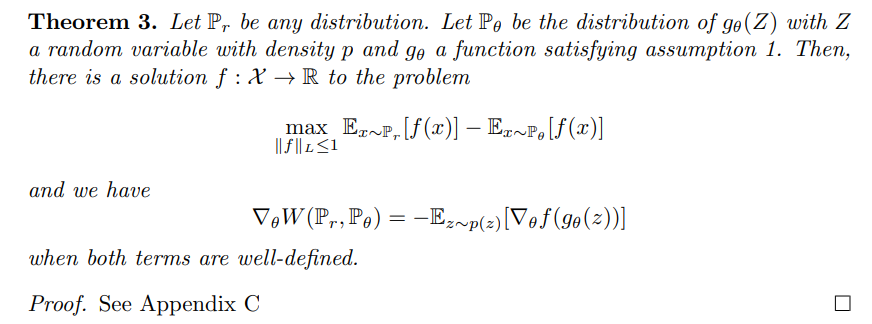

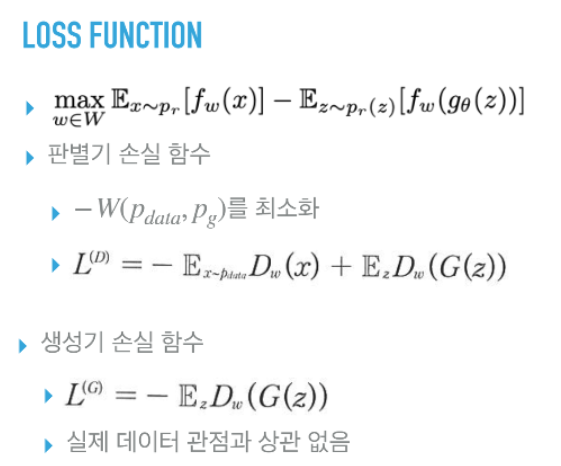



### Algorithm of WGAN
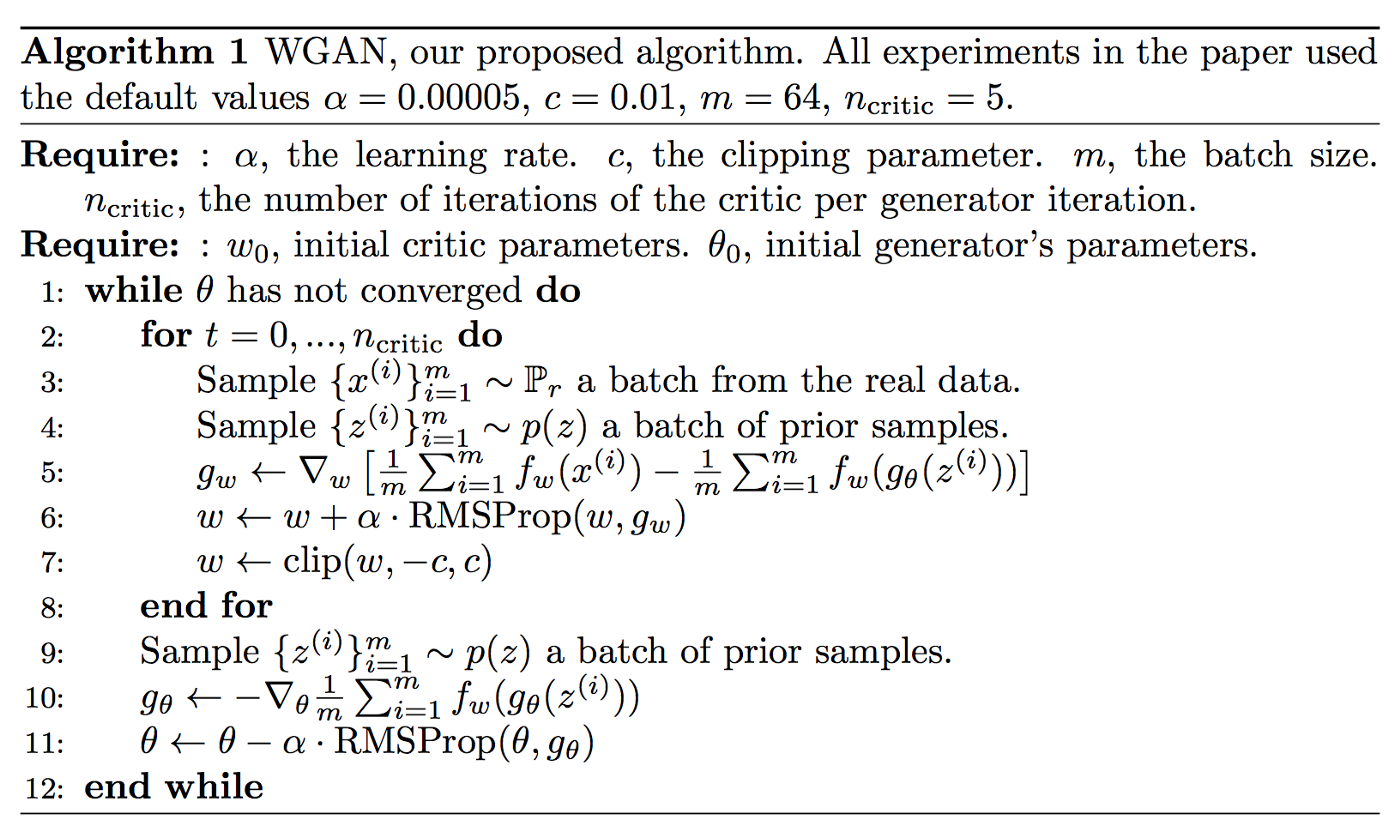

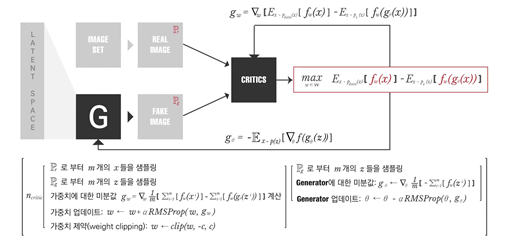

- 판별기(Critic, f)의 가중치 $w$ 5번 update → 생성기(g) 가중치 $\theta$ 1번 update
 - WGAN에서는 판별기가 먼저 최적화되어도 유의미한 gradient 생성하기 때문 (GAN은 X)
- Optimizer : Adam 등의 Momentum-based 대신 RMSProp 사용
 - Critic에 사용되는 loss가 nonstationary 이므로 RMSProp으로 학습 안정화



### GAN vs. WGAN

- 디자인적 구조 측면에서는 거의 비슷 (critic의 출력단에 sigmoid 없는 것 제외)
- 가장 큰 차이는 Cost function

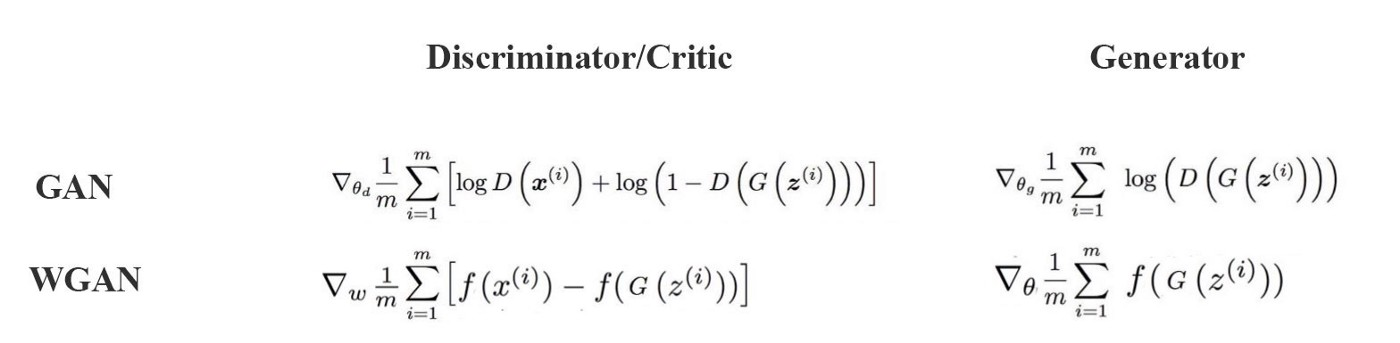

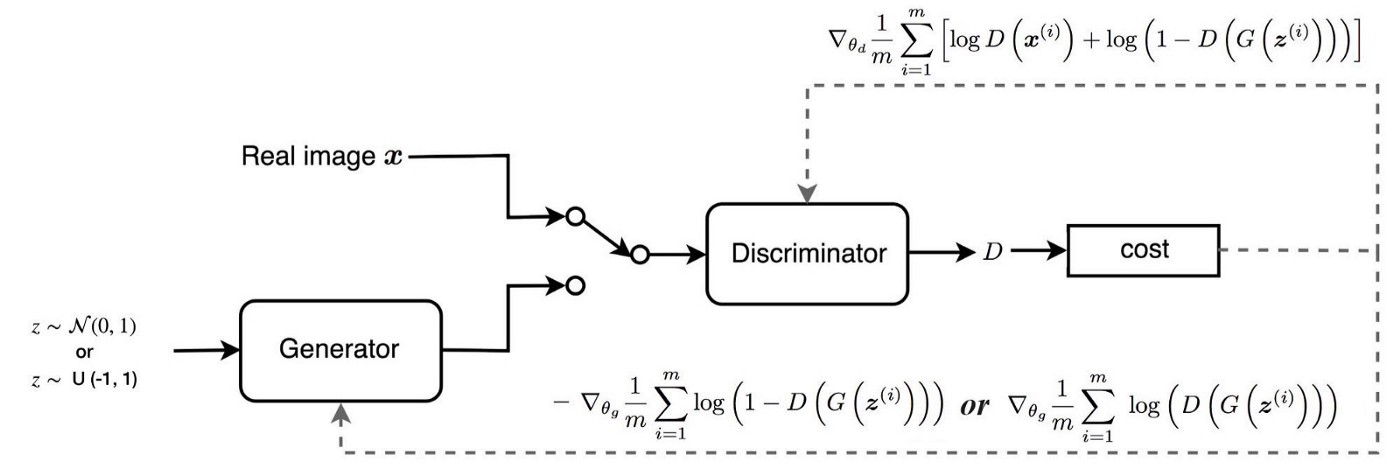
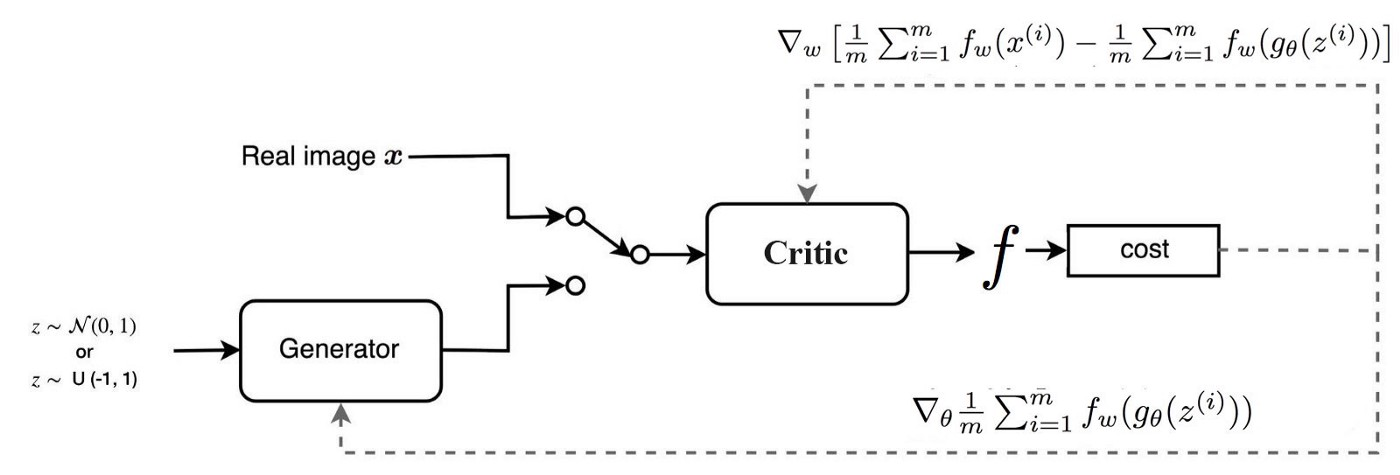




---

### 4. Results

Image Generation : GAN << WGAN

(1) convolutional DCGAN generator  
(2) convolutional DCGAN generator without batch normalization with 512 hidden units  
(3) 4-layer ReLU-MLP with 512 hidden units   

- (2), (3) 구조에서 WGAN(왼쪽)의 결과가 GAN(오른쪽)의 결과에 비해 훨씬 좋음

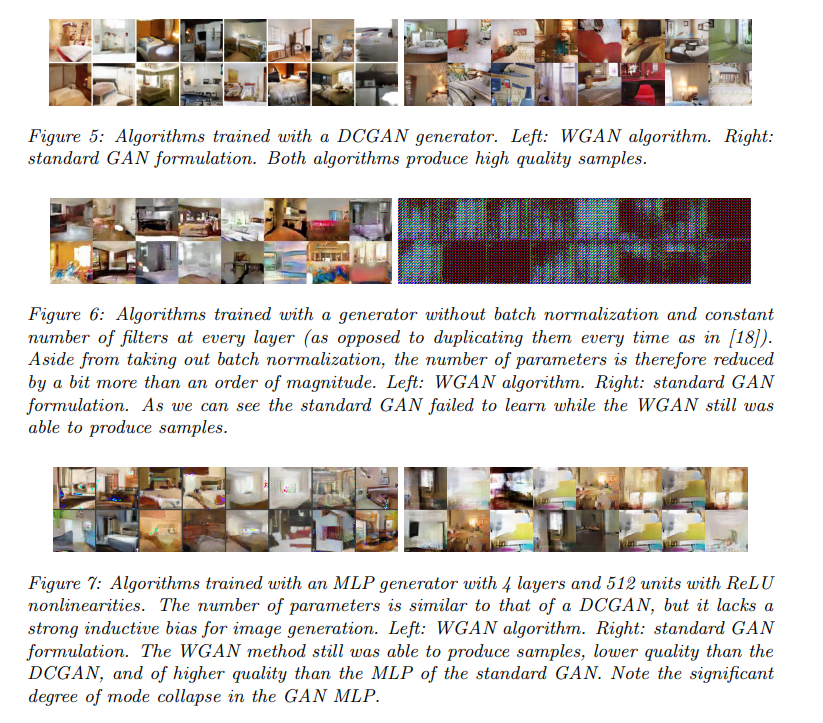





## Implementation Review

Reference : https://github.com/PeterKim1/paper_code_review/tree/master/5.%20Wasserstein%20GAN(WGAN)

In [ ]:
import argparse
import os
import numpy as np
import math
import sys
from tqdm.auto import tqdm
import torchvision.transforms as transforms
from torchvision.utils import save_image

from torch.utils.data import DataLoader
import torchvision
from torch.autograd import Variable
import shutil

import torch.nn as nn
import torch.nn.functional as F
import torch
from torch.utils.tensorboard import SummaryWriter
import datetime

EPOCHS = 30
BATCH_SIZE = 128

current_time = datetime.datetime.now() + datetime.timedelta(hours= 9)
current_time = current_time.strftime('%Y-%m-%d-%H:%M')

saved_loc = os.path.join('/content/drive/MyDrive/WGAN_Result', current_time)
if os.path.exists(saved_loc):
    shutil.rmtree(saved_loc)
os.mkdir(saved_loc)

image_loc = os.path.join(saved_loc, "images")
os.mkdir(image_loc)
weight_loc = os.path.join(saved_loc, "weights")
os.mkdir(weight_loc)

print("결과 저장 위치: ", saved_loc)
print("이미지 저장 위치: ", image_loc)
print("가중치 저장 위치: ", weight_loc)

writer = SummaryWriter(saved_loc)

transformation = transforms.Compose([
        transforms.Resize(32),
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,)),
    ])


train_dataset = torchvision.datasets.MNIST(root = '/content/drive/MyDrive/MNIST', train = True, download = True, 
                                            transform = transformation)

print("dataset size: ", len(train_dataset))

trainloader = torch.utils.data.DataLoader(train_dataset, batch_size = BATCH_SIZE, shuffle = True, num_workers = 2)

latent_dim = 100

clip_value = 0.005
n_critic = 5
sample_interval = 400

img_shape = (1, 32, 32)

cuda = True if torch.cuda.is_available() else False


# Generator
class Generator(torch.nn.Module):
    def __init__(self, channels):
        super().__init__()
        # Filters [1024, 512, 256]
        # Input_dim = 100
        # Output_dim = C (number of channels)
        self.main_module = nn.Sequential(
            # Z latent vector 100
            nn.ConvTranspose2d(in_channels=100, out_channels=1024, kernel_size=4, stride=1, padding=0),
            nn.BatchNorm2d(num_features=1024),
            nn.ReLU(True),

            # State (1024x4x4)
            nn.ConvTranspose2d(in_channels=1024, out_channels=512, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(num_features=512),
            nn.ReLU(True),

            # State (512x8x8)
            nn.ConvTranspose2d(in_channels=512, out_channels=256, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(num_features=256),
            nn.ReLU(True),

            # State (256x16x16)
            nn.ConvTranspose2d(in_channels=256, out_channels=channels, kernel_size=4, stride=2, padding=1))
            # output of main module --> Image (Cx32x32)

        self.output = nn.Tanh()

    def forward(self, x):
        x = self.main_module(x)
        return self.output(x)


# Discriminator
class Discriminator(torch.nn.Module):
    def __init__(self, channels):
        super().__init__()
        # Filters [256, 512, 1024]
        # Input_dim = channels (Cx64x64)
        # Output_dim = 1
        self.main_module = nn.Sequential(
            # Image (Cx32x32)
            nn.Conv2d(in_channels=channels, out_channels=256, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2, inplace=True),

            # State (256x16x16)
            nn.Conv2d(in_channels=256, out_channels=512, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),

            # State (512x8x8)
            nn.Conv2d(in_channels=512, out_channels=1024, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(1024),
            nn.LeakyReLU(0.2, inplace=True))
            # outptut of main module --> State (1024x4x4)

        self.output = nn.Sequential(
            nn.Conv2d(in_channels=1024, out_channels=1, kernel_size=4, stride=1, padding=0),
            # Output 1
        )

    def forward(self, x):
        x = self.main_module(x)
        return self.output(x)


# Initialize generator and discriminator
generator = Generator(1)
discriminator = Discriminator(1)

if cuda:
    generator.cuda()
    discriminator.cuda()

fixed_noise = torch.randn(16, 100, 1, 1).cuda()


# Optimizers
optimizer_G = torch.optim.RMSprop(generator.parameters(), lr=0.00005)
optimizer_D = torch.optim.RMSprop(discriminator.parameters(), lr=0.00005)

Tensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor

# ----------
#  Training
# ----------

batches_done = 0
for epoch in tqdm(range(EPOCHS)):

    D_losses = []
    G_losses = []

    for i, (imgs, _) in enumerate(trainloader):

        # Configure input
        real_imgs = Variable(imgs.type(Tensor))

        # ---------------------
        #  Train Discriminator
        # ---------------------

        optimizer_D.zero_grad()

        # Sample noise as generator input
        z = Variable(Tensor(np.random.normal(0, 1, (imgs.shape[0], latent_dim, 1, 1))))

        # Generate a batch of images
        fake_imgs = generator(z).detach()
        # Adversarial loss
        loss_D = -torch.mean(discriminator(real_imgs)) + torch.mean(discriminator(fake_imgs))

        writer.add_scalar("Train/Wasserstein_estimate", -loss_D.item(), batches_done)

        loss_D.backward()
        optimizer_D.step()

        D_losses.append(-loss_D.item())

        # Clip weights of discriminator
        for p in discriminator.parameters():
            p.data.clamp_(-clip_value, clip_value)

        # Train the generator every n_critic iterations
        if i % n_critic == 0:

            # -----------------
            #  Train Generator
            # -----------------

            optimizer_G.zero_grad()

            # Generate a batch of images
            gen_imgs = generator(z)
            # Adversarial loss
            loss_G = -torch.mean(discriminator(gen_imgs))

            writer.add_scalar("Train/Generator_loss", loss_G.item(), batches_done // n_critic)

            G_losses.append(loss_G.item())

            loss_G.backward()
            optimizer_G.step()

            
        if batches_done % 100 == 0:
             print(
            "[Epoch %d/%d] [Batch %d/%d] [D loss: %f] [G loss: %f]"
            % (epoch, EPOCHS, batches_done % len(trainloader), len(trainloader), -loss_D.item(), loss_G.item())
            ) 
        

        if batches_done % sample_interval == 0:
            fake = generator(fixed_noise)
            save_image(fake.data[:10], os.path.join(image_loc, "fake_samples_epoch_%03d_index_%03d.png" % (epoch, i)), nrow=5, normalize=True)
        batches_dohttp://localhost:8888/notebooks/WGAN.ipynb#ne += 1
    
    
    torch.save(generator.state_dict(), '%s/Generator_epoch_%d.pth' % (weight_loc, epoch))
    torch.save(discriminator.state_dict(), '%s/Discriminator_epoch_%d.pth' % (weight_loc, epoch))

    D_loss_epoch = torch.mean(torch.FloatTensor(D_losses))
    G_loss_epoch = torch.mean(torch.FloatTensor(G_losses))
    writer.add_scalars('Train/loss per epoch', {'Average Wasserstein estimate per epoch' : D_loss_epoch.item(),
                             'Average Generator loss per epoch' : G_loss_epoch.item()}, epoch)
        
writer.close()

### Reference
- https://arxiv.org/pdf/1701.07875v3.pdf
- https://jonathan-hui.medium.com/gan-wasserstein-gan-wgan-gp-6a1a2aa1b490
- https://www.slideshare.net/ssuser7e10e4/wasserstein-gan-i
- https://haawron.tistory.com/21
- https://engineer-mole.tistory.com/52
- https://cumulu-s.tistory.com/31
- https://cumulu-s.tistory.com/32